In [1]:
%matplotlib inline
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
"""
Things happened:
1. create a `IntSlider` widget object with an optional default value.
2. the widget passes value to `f1`, with which the `f1` can do somethin (matching by `x`).
(the `x` here can be viewd as a 'vaiable delivered': a variable holding by the widget and being passed to `f1`)
3. run `f1` once, and repeat this every time 'a move' is detected.
4. return the original `f1`.
"""
def f1(x, ): return x + 1
f2 = widgets.interact(f1, x=widgets.IntSlider(2), )
print(f1 is f2, f2(10))

""" An equal version: """
# @widgets.interact(x=2)
# def f1(x): return x + 1

""" decorator and listener registration? """
pass

interactive(children=(IntSlider(value=2, description='x'), Output()), _dom_classes=('widget-interact',))

True 11


In [3]:
"""
Things happened:
1.2. ditto
3. return the `IntSlider` and original `f1`
"""
def f1(x): return x + 1
w = widgets.interactive(f1, x=widgets.IntSlider(2))
print(w)
display(w)

interactive(children=(IntSlider(value=2, description='x'), Output()), _dom_classes=('widget-interact',))


interactive(children=(IntSlider(value=2, description='x'), Output()), _dom_classes=('widget-interact',))

In [4]:
"""
design the widgets and outputs separately.
"""
import matplotlib.pyplot as plt
a = widgets.IntSlider(1)
b = widgets.IntSlider(10)
c = widgets.IntSlider(4)
ui = widgets.HBox([a, b, c])
def f(x, y, z): 
    print((x, y, z)); 
#     plt.plot((x,y,z)); display(ui)
out = widgets.interactive_output(f, {'x': a, 'y': c, 'z': b})
# display(ui, out)
display(ui, out)

HBox(children=(IntSlider(value=1), IntSlider(value=10), IntSlider(value=4)))

Output()

In [5]:
def f(m, b):
    plt.figure(1)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 10)
    plt.show()

"""`m` and `b` here means variables delivered to `f`."""
interactive_plot = widgets.interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, description='b', max=3.0, min=-3.0, step=0.5), Output(layout=Layout(height='350px'))), _dom_classes=('widget-interact',))

In [6]:
""" get `ax` by dict? """
# lines = ax.plot(x, 'y')
def plot(var_delivered):
#     global lines
#     lines = plt.plot([2,3,6])
    """ `plt` must be put in `plot`, error if else. """
    fig, ax = plt.subplots()
    x = [3,4,5]
    if var_delivered == 'b':
        ax.plot(x, 'bo')
#         lines[0].set_linestyle('dotted')
    elif var_delivered == 'c':
        ax.plot(x, 'y')
#         lines[0].set_linestyle('dashed')
#         lines[0].set_color('blue')

w = widgets.RadioButtons(
    options=['a', 'b', 'c'],
#     value='pineapple',
    description='>_<',
    disabled=False
)

x = widgets.interactive(plot, var_delivered=w, )
display(x)

interactive(children=(RadioButtons(description='>_<', options=('a', 'b', 'c'), value='a'), Output()), _dom_classes=('widget-interact',))

In [7]:
display(3)

3

<IPython.core.display.Javascript object>


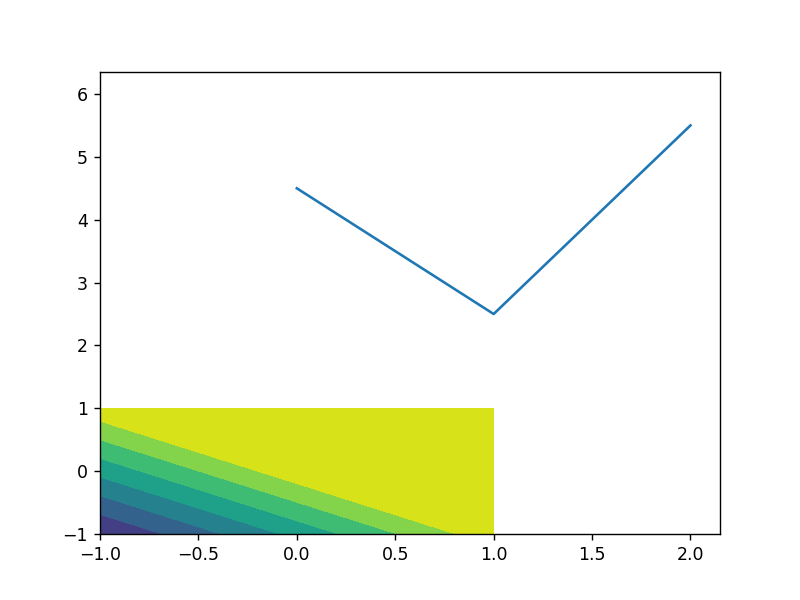

dir ['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


interactive(children=(FloatSlider(value=0.0, description='i', max=1.0), Output()), _dom_classes=('widget-interact',))

'\nipywidgets, plt.canvas..., relim,\n'

In [11]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

global fig, ax, l
fig, ax = plt.subplots()
l, = ax.plot(range(3), [4,6,5])

if 'ax' in globals(): del ax
def update(i):
    l.set_data(range(3),np.array([4,2,5]) + i)
    plt.show()
#     ax.relim()
#     ax.autoscale_view(True, True, True)
print('dir', dir(update))
    
    
widgets.interact(update, i=(0,1,0.1))
# print('axA' in locals())
# print('axA' in globals())

"""
ipywidgets, plt.canvas..., relim,
"""

<IPython.core.display.Javascript object>


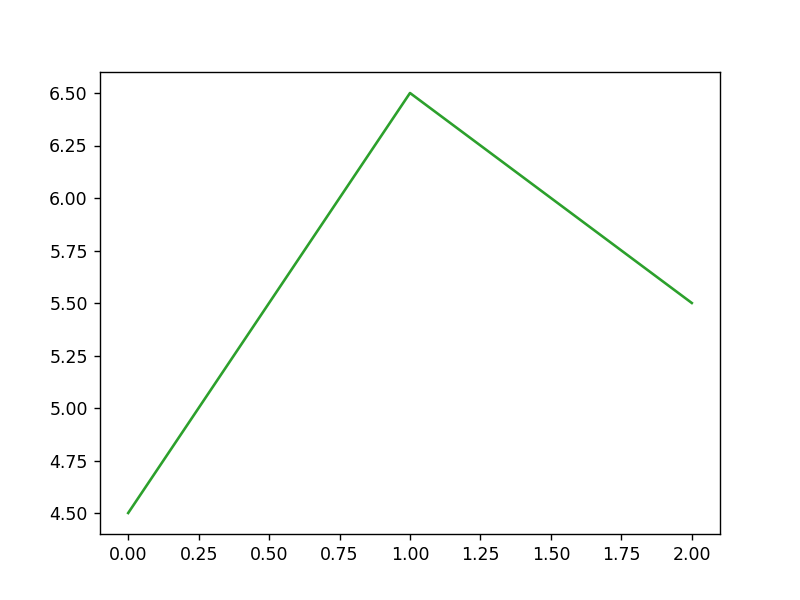

interactive(children=(FloatSlider(value=0.0, description='new_val', max=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.on_value_change2>

In [3]:
import numpy as np
%matplotlib notebook
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display


fig, ax = plt.subplots()
# l, = ax.plot(range(3), np.array([4,6,5]))
# print(len(ax.lines))
# print(id(l))

w = widgets.FloatSlider(min=0,max=1,step=0.1)
# display(w)

def on_value_change(change):
    new_val = change['new']
#     fig, ax = plt.subplots(figsize=(3,3))
    ax.lines.clear()
    ax.plot(range(3),np.array([4,6,5]) + new_val)
    ax.relim()
    ax.autoscale()
    
def on_value_change2(new_val):
#     fig, ax = plt.subplots()
    ax.lines.clear()
    ax.plot(range(3),np.array([4,6,5]) + new_val)
    ax.relim()
    ax.autoscale()

# w.observe(on_value_change, names='value')
widgets.interact(on_value_change2, new_val=w)

<IPython.core.display.Javascript object>


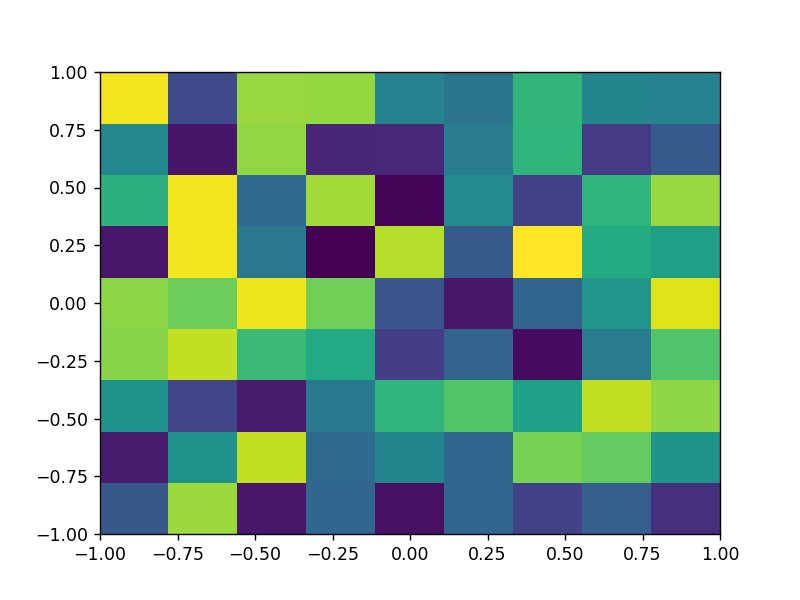

In [3]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from dill.source import getsource
import feature_visualization as fv
import time 

quad = plt.pcolormesh(
    *fv.sampling('square', 'matplotlib', 10).reshape(2,10,10), 
    np.random.random((9,9))
)
# quad.set_array(np.random.random((9,9)))
plt.draw()
print(quad)
# print(getsource(quad.set))
# ax.set_array(np.random.random((5, )))
# print(dir(ax))

# print(ax.collections.clear())
# print(ax.collections)
# plt.show()